In [1]:
# Simple(독립변수 1개) Linear Regression을 구현해 보아요!
# 사용하는 데이터 ozone데이터를 이용할꺼예요!
# 태양광세기, 바람, 온도를 기반으로 ozone량이 결정되는데
# 이걸 측정한 데이터

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

from sklearn import linear_model

from scipy import stats

Matplotlib created a temporary config/cache directory at C:\Users\lee_0\AppData\Local\Temp\matplotlib-z8w13o4s because the default path (C:\Users\lee_0\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# Pyhton 직접구현

## 수치미분 코드
def numerical_derivative(f, x):

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index

        tmp = x[idx]

        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# Raw Data Loading
df = pd.read_csv(r"C:\Users\lee_0\Desktop\코딩\ML\11.29\ozone.csv")

training_data = df[['Temp', 'Ozone']]

# 1. 결측치 처리
training_data = training_data.dropna(how='any')

# Training Data Set 준비
x_data = training_data['Temp'].values.reshape(-1, 1)
t_data = training_data['Ozone'].values.reshape(-1, 1)

# Model을 만들어야 하는데... y = Wx + b
W = np.random.rand(1, 1)
b = np.random.rand(1)

# loss function(MSE)
def loss_func(input_data):

    input_w = input_data[0]
    input_b = input_data[1]

    y = np.dot(x_data, input_w) + input_b

    return np.mean(np.power((t_data - y), 2))

# 모델이 완성된 후 예측하는 함수를 하나 만들어요!
def predict(x):

    return np.dot(x, W) + b

# learning rate 정의(hyperparameter)
learning_rate = 1e-4

# 학습진행
for step in range(300000):

    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(-1, 1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')

W : [[0.6055345]], b : [0.0084109], loss : 1026.3350039475224
W : [[0.72323544]], b : [-12.23628202], loss : 815.9336616695679
W : [[0.86528741]], b : [-23.46065676], loss : 773.9047541256523
W : [[0.99550757]], b : [-33.75012999], loss : 738.5856182850491
W : [[1.11488142]], b : [-43.18257159], loss : 708.9050619858147
W : [[1.22431238]], b : [-51.82936552], loss : 683.9629052417305
W : [[1.3246286]], b : [-59.75595], loss : 663.0026787294044
W : [[1.41658928]], b : [-67.02231278], loss : 645.3886808719116
W : [[1.50089036]], b : [-73.68344509], loss : 630.5866976806024
W : [[1.57816983]], b : [-79.78975784], loss : 618.1478006074321


[[16.85135247]]


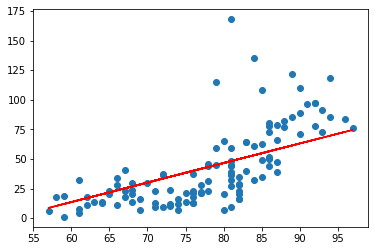

In [3]:
# 학습종료 후 예측
# 온도가 62도일때 Ozone량은 얼마?
print(predict(np.array([[62]])))  # [[16.87057092]]
# 이거 맞는거야???
# 그래프로 확인해 보아요!
# (독립변수 1개니까 2차원 평면에 모델을 그릴수 있어요)

# 데이터를 2차원 평면에 찍어보아요!
plt.scatter(x_data, t_data)
# 우리 모델을 그려보아요!
plt.plot(x_data, x_data*W.ravel() + b, color='r')
plt.show()

In [4]:
# 같은 내용을이제 Tensorflow Keras를 이용해서 구현!

# Raw Data Loading
df = pd.read_csv(r"C:\Users\lee_0\Desktop\코딩\ML\11.29\ozone.csv")

training_data = df[['Temp', 'Ozone']]

# 1. 결측치 처리
training_data = training_data.dropna(how='any')

# Training Data Set 준비
x_data = training_data['Temp'].values.reshape(-1, 1)
t_data = training_data['Ozone'].values.reshape(-1, 1)

# Model 생성
model = Sequential()

model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1,
                     activation='linear')

model.add(output_layer)

# Model 설정
model.compile(optimizer=SGD(learning_rate=1e-4),
              loss='mse')

# Model 학습
model.fit(x_data,
          t_data,
          epochs=2000,
          verbose=0)

[[40.7541]]


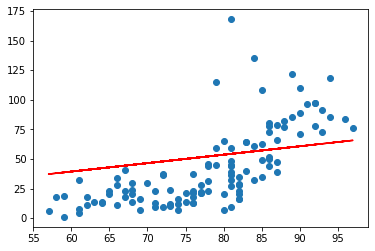

In [5]:
# 학습이 끝났으니 예측을 해 보아요!
print(model.predict(np.array([[62]])))  # [[35.74613]]

# 그래프로 확인해 보아요
# W와 b가 필요해요!
weights, bias = output_layer.get_weights()

# 데이터를 2차원 평면에 찍어보아요!
plt.scatter(x_data, t_data)
# 우리 모델을 그려보아요!
plt.plot(x_data, x_data*weights + bias, color='r')
plt.show()

[[3.58411393]]


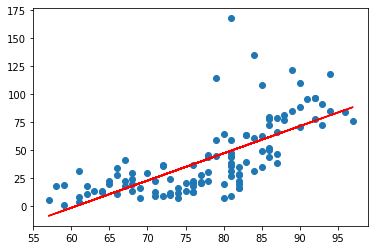

In [6]:
# 정답(?)을 확인하기 위해 sklearn 구현을 해 보아요!

# Raw Data Loading
df = pd.read_csv(r"C:\Users\lee_0\Desktop\코딩\ML\11.29\ozone.csv")

training_data = df[['Temp', 'Ozone']]

# 1. 결측치 처리
training_data = training_data.dropna(how='any')

# Training Data Set 준비
x_data = training_data['Temp'].values.reshape(-1, 1)
t_data = training_data['Ozone'].values.reshape(-1, 1)

# Model 생성
sklearn_model = linear_model.LinearRegression()

# Model 학습
sklearn_model.fit(x_data, t_data)

# W와 b를 알아야지 나중에 그래프를 그릴 수 있겠죠.
weights = sklearn_model.coef_
bias = sklearn_model.intercept_

# 예측을 해 보아요!
print(sklearn_model.predict(np.array([[62]])))  # [[3.58411393]]

# 데이터를 2차원 평면에 찍어보아요!
plt.scatter(x_data, t_data)
# 우리 모델을 그려보아요!
plt.plot(x_data, x_data*weights + bias, color='r')
plt.show()

8.0
4.5
11.5
7.0
22.0
-6.0
[22.1]
[]
[22.1]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


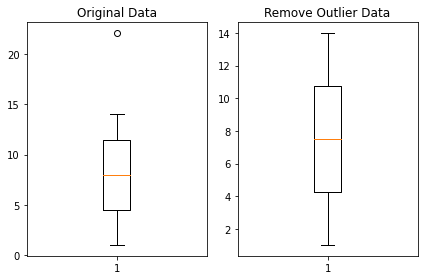

In [2]:
# Tukey's Fence 방식으로 이상치를 검출해보아요!

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

fig = plt.figure()

fig_1 = fig.add_subplot(1, 2, 1)  # 1행 2열의 첫번째
fig_2 = fig.add_subplot(1, 2, 2)  # 1행 2열의 두번째

print(np.median(data))  # 8.0
print(np.percentile(data, 25))  # 4.5
print(np.percentile(data, 75))  # 11.5

# IQR value
iqr_value = np.percentile(data, 75) - np.percentile(data, 25)
print(iqr_value)  # 7.0

upper_fence = np.percentile(data, 75) + 1.5 * iqr_value
print(upper_fence)  # 22.0
lower_fence = np.percentile(data, 25) - 1.5 * iqr_value
print(lower_fence)  # -6.0

# 이렇게 tukey fence방식을 이용하면 이상치를 구분하는
# 기준선을 알아낼 수 있네요!

# 내가 가지고 있는 데이터에 대해 이상치를 출력해보세요!
# boolean indexing을 이용해요!
print(data[data > upper_fence])  # [22.1]
print(data[data < lower_fence])  # []
print(data[(data > upper_fence) | (data < lower_fence)])  # [22.1]

# 데이터를 정제하는게 목적이예요. 이상치를 제거하는게 목적!
result_data = data[(data <= upper_fence) & (data >= lower_fence)]
print(result_data)

fig_1.set_title('Original Data')
fig_1.boxplot(data)

fig_2.set_title('Remove Outlier Data')
fig_2.boxplot(result_data)

plt.tight_layout()
plt.show()

In [3]:
# 정규분포(Z-score)를 이용한 이상치 구별방식
# 이 방식을 이용하려면
# 기본적으로 우리 데이터를 정규분포화 시켜서 우리 데이터에 대한
# z_score값을 각각 구해야 되요!
# 그리고 기준치를 설정한 다음 그 기준치를 넘는 데이터를 이상치로 판별

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

zscore_threshold = 2.0  # 일반적으로 2.0을 많이 사용

print(np.abs(stats.zscore(data)) > zscore_threshold)
outlier = data[np.abs(stats.zscore(data)) > zscore_threshold]

# 이상치를 제거한 결과
print(data[np.isin(data, outlier, invert=True)])

[False False False False False False False False False False False False
 False False  True]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


In [4]:
# python 구현과 tensorflow 구현, sklearn 구현
# 이상치를 제거한 데이터를 이용해서 학습시키고 결과 그래프를 출력해 보아요!
# 62도에서의 예측치를 각각 구해보아요!

In [5]:
# 데이터는 공통으로 사용하니 먼저 사용하는 데이터 정제부터 하고
# 각각 구현하는게 좋을 듯 싶어요!

# Raw Data Loading
df = pd.read_csv(r"C:\Users\lee_0\Desktop\코딩\ML\11.29\ozone.csv")

training_data = df[['Temp', 'Ozone']]

# 1. 결측치 처리
training_data = training_data.dropna(how='any')

# 2. 이상치 처리
zscore_threshold = 1.8

outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'].values)) > zscore_threshold]

print(outlier)

# 이상치를 제거한 결과를 얻어야 해요!
# 내가 가진 DataFrame에서 이상치를 제거하면 되요!
training_data = training_data.loc[np.isin(training_data['Ozone'], outlier, invert=True)]

# Training Data Set 준비
x_data = training_data['Temp'].values.reshape(-1, 1)
t_data = training_data['Ozone'].values.reshape(-1, 1)

29     115.0
61     135.0
85     108.0
98     122.0
100    110.0
116    168.0
120    118.0
Name: Ozone, dtype: float64


In [6]:
# Python 직접구현

## 수치미분 코드
def numerical_derivative(f, x):

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index

        tmp = x[idx]

        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# Model을 만들어야 하는데... y = Wx + b
W = np.random.rand(1, 1)
b = np.random.rand(1)

# loss function(MSE)
def loss_func(input_data):

    input_w = input_data[0]
    input_b = input_data[1]

    y = np.dot(x_data, input_w) + input_b

    return np.mean(np.power((t_data - y), 2))

# 모델이 완성된 후 예측하는 함수를 하나 만들어요!
def predict(x):

    return np.dot(x, W) + b

# learning rate 정의(hyperparameter)
learning_rate = 1e-4

# 학습진행
for step in range(300000):

    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(-1, 1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')
    
# 학습종료 후 예측
# 온도가 62도일때 Ozone량은 얼마?
print(predict(np.array([[62]])))  # [[15.56009003]]

W : [[0.58218019]], b : [0.34722297], loss : 1492.578648712216
W : [[0.63035171]], b : [-10.2664341], loss : 455.58820103140545
W : [[0.75418313]], b : [-19.98687611], loss : 424.0670505630589
W : [[0.8676051]], b : [-28.89020348], loss : 397.62258972069185
W : [[0.97149265]], b : [-37.04510405], loss : 375.4371840878545
W : [[1.06664726]], b : [-44.5144917], loss : 356.8248846705393
W : [[1.15380304]], b : [-51.35599163], loss : 341.21021909567173
W : [[1.23363237]], b : [-57.62238503], loss : 328.11039861951275
W : [[1.30675113]], b : [-63.36201618], loss : 317.1203908166171
W : [[1.37372342]], b : [-68.6191655], loss : 307.9003964107671
[[15.53972854]]


In [7]:
# Tensorflow Keras를 이용해서 구현

# Model 생성
model = Sequential()

model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1,
                     activation='linear')

model.add(output_layer)

# Model 설정
model.compile(optimizer=SGD(learning_rate=1e-4),
              loss='mse')

# Model 학습
model.fit(x_data,
          t_data,
          epochs=2000,
          verbose=0)

# 학습이 끝났으니 예측을 해 보아요!
print(model.predict(np.array([[62]])))  # [[26.496178]]

# 그래프로 확인해 보아요
# W와 b가 필요해요!
weights, bias = output_layer.get_weights()

[[33.18582]]


In [8]:
# 정답(?)을 확인하기 위해 sklearn 구현을 해 보아요!

# Model 생성
sklearn_model = linear_model.LinearRegression()

# Model 학습
sklearn_model.fit(x_data, t_data)

# 예측을 해 보아요!
print(sklearn_model.predict(np.array([[62]])))  # [[4.51299041]]

[[4.51299041]]


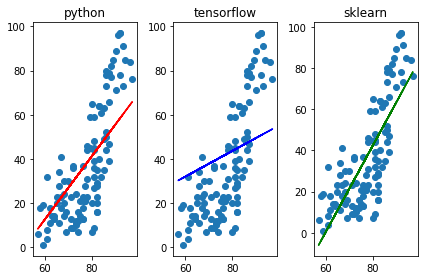

In [9]:
##### 결과를 그래프로 확인해 보아요! #####

fig = plt.figure()

fig_python = fig.add_subplot(1, 3, 1)
fig_tensorflow = fig.add_subplot(1, 3, 2)
fig_sklearn = fig.add_subplot(1, 3, 3)

fig_python.set_title('python')
fig_tensorflow.set_title('tensorflow')
fig_sklearn.set_title('sklearn')

fig_python.scatter(x_data, t_data)
fig_python.plot(x_data, x_data*W.ravel() + b, color='r')

fig_tensorflow.scatter(x_data, t_data)
fig_tensorflow.plot(x_data, x_data*weights + bias, color='b')

fig_sklearn.scatter(x_data, t_data)
fig_sklearn.plot(x_data,
                 x_data*sklearn_model.coef_ + sklearn_model.intercept_,
                 color='g')

plt.tight_layout()
plt.show()